# TASK

- Remove the column "Unnamed:0"
- get the categorical column names
- get the numerical columns
- Replace the missing values in numerical columns with their mean
- Draw the histogram of any one numerical column
    - Place the title of the graph as "Histogram"
    - On each bin print the count in that bin in the graph
- Draw the boxplot of any one column
- Create a subplot of (2,2).
    - (2,2,1) is a histogram
    - (2,2,2) is a boxplot
- Create a Subplot caluculate the no of graphs required based on number of numerical columns.
    - No of rows in the subplot equal to no of numerical columns
    - The plot should contains two graphs in each row. 
        - First is histogram and 
        - the second one is boxplot
    - Use figure size in plt.figure for proper graph size.
- Create Barplot for a categorical column
    - use the legend
    - xlabel
    - ylabel
- Create a subplot for categorical column barplots

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("master.csv")

### 1. Remove the column  "Unnamed: 0"

In [3]:
data.drop("Unnamed: 0", axis = 1 ,inplace = True)

In [4]:
data.head()

,Order_ID,Ship_Mode,Ship_Date,Ship_id,Ship_Year,Ship_Month,Ord_id,Prod_id,Cust_id,Sales,...,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment,Order_Date,Order_Priority,Order_Month,Order_Year,Duration
0,3,REGULAR AIR,2010-10-20,SHP_1,2010,10,Ord_1,Prod_1,Cust_1,261.5400,...,STORAGE & ORGANIZATION,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,2010-10-13,LOW,10,2010,7
1,293,DELIVERY TRUCK,2012-02-10,SHP_2,2012,2,Ord_2,Prod_2,Cust_2,10123.0200,...,APPLIANCES,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,2012-01-10,HIGH,1,2012,0
2,293,REGULAR AIR,2012-03-10,SHP_3,2012,3,Ord_2,Prod_3,Cust_2,244.5700,...,BINDERS AND BINDER ACCESSORIES,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,2012-01-10,HIGH,1,2012,0
3,483,REGULAR AIR,2011-12-07,SHP_4,2011,12,Ord_3,Prod_4,Cust_3,4965.7595,...,TELEPHONES AND COMMUNICATION,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,2011-10-07,HIGH,10,2011,0
4,515,REGULAR AIR,2010-08-30,SHP_5,2010,8,Ord_4,Prod_2,Cust_4,394.2700,...,APPLIANCES,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,2010-08-28,NOT SPECIFIED,8,2010,2


### 2.get the categorical column names

In [5]:
data.columns

Index(['Order_ID', 'Ship_Mode', 'Ship_Date', 'Ship_id', 'Ship_Year',
       'Ship_Month', 'Ord_id', 'Prod_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Product_Category', 'Product_Sub_Category', 'Customer_Name', 'Province',
       'Region', 'Customer_Segment', 'Order_Date', 'Order_Priority',
       'Order_Month', 'Order_Year', 'Duration'],
      dtype='object')

### 3.get the numerical columns

In [37]:
# num_cols = data.select_dtypes(include=np.number)
num_cols = data.columns[data.dtypes != object]
num_cols

Index(['Order_ID', 'Ship_Year', 'Ship_Month', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Order_Month', 'Order_Year', 'Duration'],
      dtype='object')

In [62]:
cat_cols = data.columns[data.dtypes == object]
len(cat_cols)

14

### 4.Replace the missing values in numerical columns with their mean

In [7]:
data.isna().sum()

Order_ID                 0
Ship_Mode                0
Ship_Date                0
Ship_id                  0
Ship_Year                0
Ship_Month               0
Ord_id                   0
Prod_id                  0
Cust_id                  0
Sales                    0
Discount                 0
Order_Quantity           0
Profit                   0
Shipping_Cost            0
Product_Base_Margin     63
Product_Category         0
Product_Sub_Category     0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Order_Date               0
Order_Priority           0
Order_Month              0
Order_Year               0
Duration                 0
dtype: int64

In [8]:
data["Product_Base_Margin"].fillna((data["Product_Base_Margin"].mean()), inplace = True)

In [9]:
data["Product_Base_Margin"].mean()

0.5125131957773528

In [10]:
data["Product_Base_Margin"].isna().sum()

0

### 5.Draw the histogram of any one numerical column
- Place the title of the graph as "Histogram"
- On each bin print the count in that bin in the graph

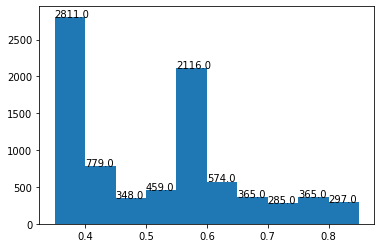

In [11]:
#plt.hist(data["Product_Base_Margin"])
# plt.title("Histogram")
# plt.text(0.35,2811,"2811")
# plt.text(0.4,779,"779")
out = plt.hist(data["Product_Base_Margin"]) 
values = out[0]
values2 = out[1]
for i,j in zip(values2,values):
    plt.text(i,j,j)

(array([2329.,  988.,  327.,  294.,  459., 2116.,  674.,  354.,  404.,
         454.]),
 array([-1.04982212, -0.9610918 , -0.87236149, -0.78363117, -0.69490085,
        -0.60617053, -0.51744021, -0.42870989, -0.33997957, -0.25124925,
        -0.16251893]),
 <a list of 10 Patch objects>)

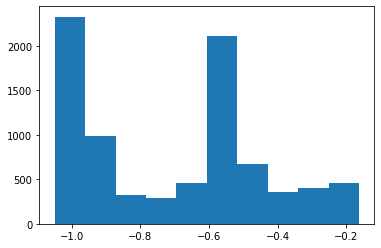

In [24]:
plt.hist(np.log(data["Product_Base_Margin"]))

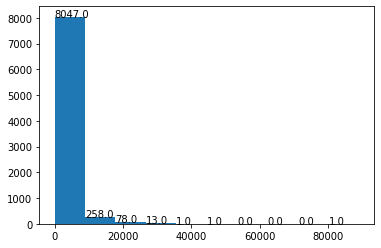

In [12]:
out = plt.hist(data["Sales"]) 
values = out[0]
values2 = out[1]
for i,j in zip(values2,values):
    plt.text(i,j,j)

(array([  20.,  155.,  547., 1497., 1963., 1671., 1420.,  870.,  252.,
           4.]),
 array([ 0.80647587,  1.86553602,  2.92459617,  3.98365632,  5.04271647,
         6.10177662,  7.16083677,  8.21989692,  9.27895707, 10.33801722,
        11.39707737]),
 <a list of 10 Patch objects>)

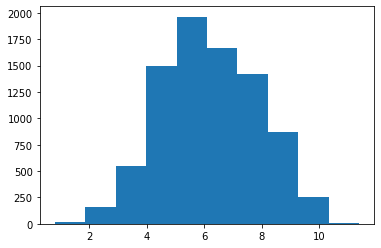

In [25]:
plt.hist(np.log(data["Sales"]))

In [13]:
import math
x1 = 1
y1 = 6
x2 = 11
y2 = 16
p1 = (x1,y1)
p2 = (x2,y2)
d = ((((x1-x2)**2+(y1-y2)**2))**0.5)
def distance (p1,p2):
    return d
distance(p1,p2)
# def absdistance (p1,p2):
#     return d


14.142135623730951

In [14]:

list(zip(values2,values))

[(2.24, 8047.0),
 (8908.121, 258.0),
 (17814.002, 78.0),
 (26719.882999999998, 13.0),
 (35625.763999999996, 1.0),
 (44531.645, 1.0),
 (53437.52599999999, 0.0),
 (62343.40699999999, 0.0),
 (71249.288, 0.0),
 (80155.169, 1.0)]

In [15]:
data.values
help(data.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. deprecated:: 0.23.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, drop t

In [16]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : scalars
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Returns
    -------
    text : `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : 

### 6.Draw the boxplot of any one column

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3b0fe8648>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3b0fe8f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3b0fecac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3b0fe4e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3b0fe0c88>],
 'means': []}

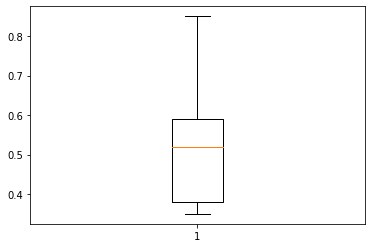

In [17]:
plt.boxplot(data["Product_Base_Margin"])

### 7.Create a subplot of (2,2).
- (2,2,1) is a histogram
- (2,2,2) is a boxplot

Text(0.5, 1.0, 'Boxplot')

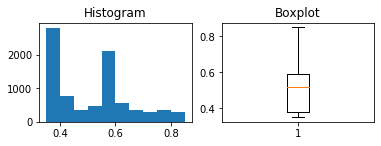

In [18]:
plt.subplot(2,2,1)
plt.hist(data["Product_Base_Margin"])
plt.title("Histogram")
plt.subplot(2,2,2)
plt.boxplot(data["Product_Base_Margin"]) 
plt.title("Boxplot")

### 8.Create a Subplot caluculate the no of graphs required based on number of numerical columns.
- No of rows in the subplot equal to no of numerical columns
- The plot should contains two graphs in each row.
   - First is histogram and
   - the second one is boxplot

Text(0.5, 1.0, 'Boxplot')

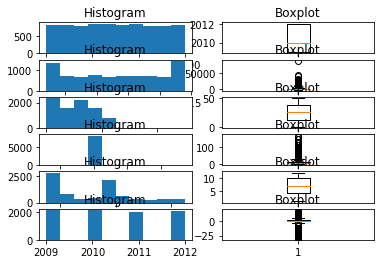

In [19]:
plt.subplot(6,2,1)
plt.hist(data["Order_ID"])
plt.title("Histogram")
plt.subplot(6,2,2)
plt.boxplot(data["Ship_Year"]) 
plt.title("Boxplot")
plt.subplot(6,2,3)
plt.hist(data["Ship_Month"])
plt.title("Histogram")
plt.subplot(6,2,4)
plt.boxplot(data["Sales"]) 
plt.title("Boxplot")
plt.subplot(6,2,5)
plt.hist(data["Discount"])
plt.title("Histogram")
plt.subplot(6,2,6)
plt.boxplot(data["Order_Quantity"]) 
plt.title("Boxplot")
plt.subplot(6,2,7)
plt.hist(data["Profit"])
plt.title("Histogram")
plt.subplot(6,2,8)
plt.boxplot(data["Shipping_Cost"]) 
plt.title("Boxplot")
plt.subplot(6,2,9)
plt.hist(data["Product_Base_Margin"])
plt.title("Histogram")
plt.subplot(6,2,10)
plt.boxplot(data["Order_Month"]) 
plt.title("Boxplot")
plt.subplot(6,2,11)
plt.hist(data["Order_Year"])
plt.title("Histogram")
plt.subplot(6,2,12)
plt.boxplot(data["Duration"]) 
plt.title("Boxplot")

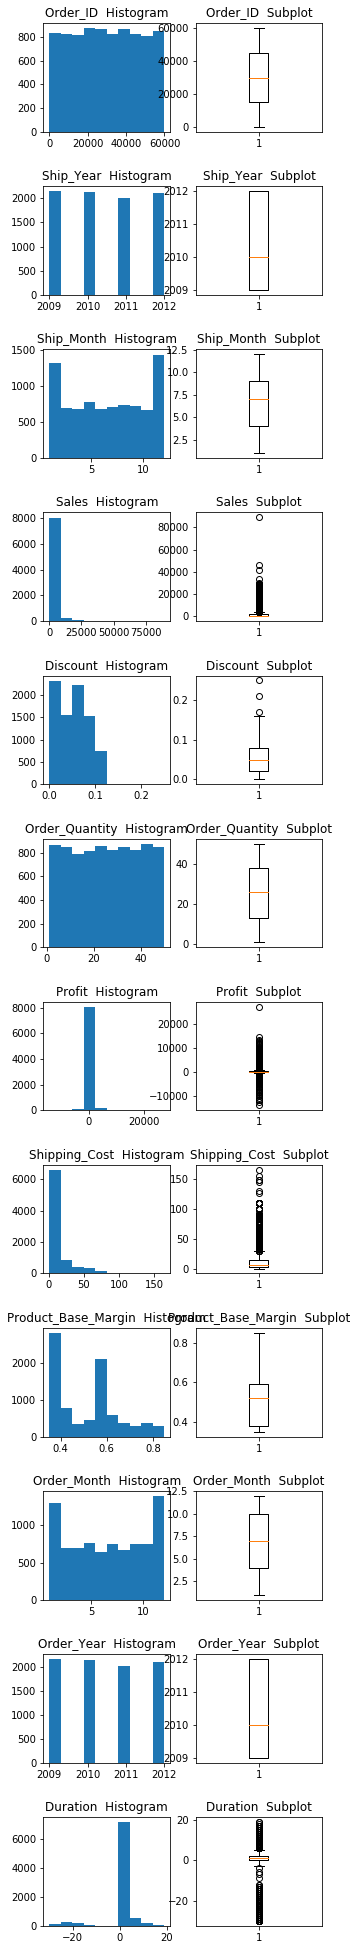

In [43]:
plt.figure(figsize=(5,35))
plt.subplots_adjust(hspace = 0.5)
for i in range((len(num_cols))):
    plt.subplot(12,2,2*i+1)
    plt.hist(data[num_cols[i]])
    plt.title(num_cols[i]+"  Histogram")
    plt.subplot(12,2,2*i+2)
    plt.boxplot(data[num_cols[i]])
    plt.title(num_cols[i]+"  Subplot")

### 9.- Create Barplot for a categorical column
    - use the legend
    - xlabel
    - ylabel
- Use figure size in plt.figure for proper graph size.

Text(0, 0.5, 'Sales')

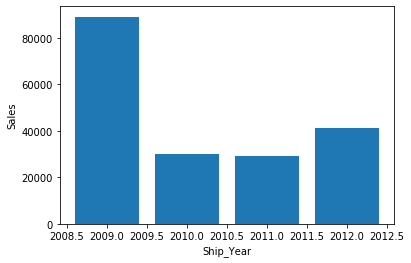

In [21]:
plt.bar(data["Ship_Year"],data["Sales"])
plt.xlabel("Ship_Year")
plt.ylabel("Sales")

Text(0.5, 1.0, 'Bar graf of Order_Priority')

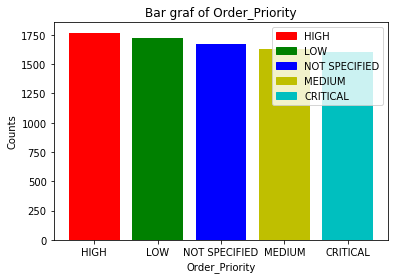

In [55]:
y = data["Order_Priority"].value_counts()
x = y.index
plt.bar(x,y,color = "rgbyc")
handles = [plt.Rectangle((0,0),1,1,color = i)for i in "rgbyc"]
plt.legend(handles,x)
plt.xlabel("Order_Priority")
plt.ylabel("Counts")
plt.title("Bar graf of Order_Priority")

<BarContainer object of 8399 artists>

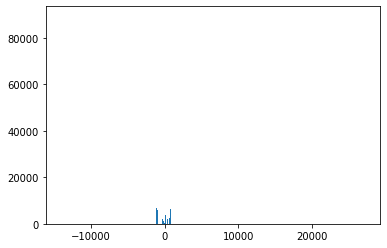

In [22]:
plt.bar(data["Profit"], data["Sales"])

In [23]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : (float, float), optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: None
   

In [56]:
plt.bar(num_cols)

TypeError: bar() missing 1 required positional argument: 'height'

TypeError: unsupported operand type(s) for /: 'str' and 'int'

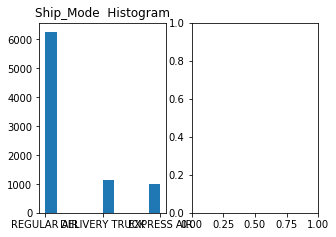

In [64]:
plt.figure(figsize=(5,35))
plt.subplots_adjust(hspace = 0.5)
for i in range((len(cat_cols))):
    plt.subplot(7,2,2*i+1)
    plt.hist(data[cat_cols[i]])
    plt.title(cat_cols[i]+"  Histogram")
    plt.subplot(7,2,2*i+2)
    plt.boxplot(data[cat_cols[i]])
    plt.title(cat_cols[i]+"  Subplot")

In [66]:
len(cat_cols)
cat_cols

Index(['Ship_Mode', 'Ship_Date', 'Ship_id', 'Ord_id', 'Prod_id', 'Cust_id',
       'Product_Category', 'Product_Sub_Category', 'Customer_Name', 'Province',
       'Region', 'Customer_Segment', 'Order_Date', 'Order_Priority'],
      dtype='object')

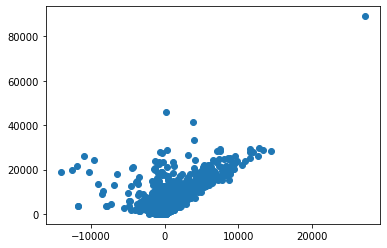

In [69]:
plt.scatter(data["Profit"], data["Sales"])

# Plots using pandas DataFrame

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3C92EF6C8>,
      dtype=object)

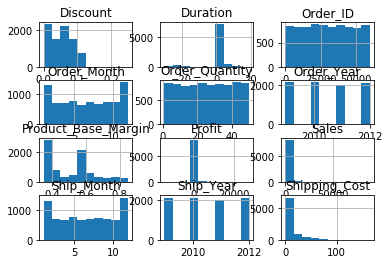

In [70]:
data.hist()

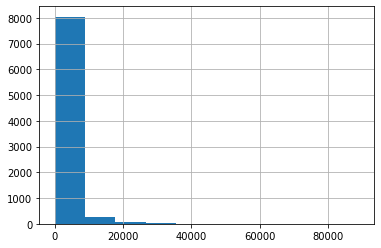

In [72]:
data.Sales.hist()

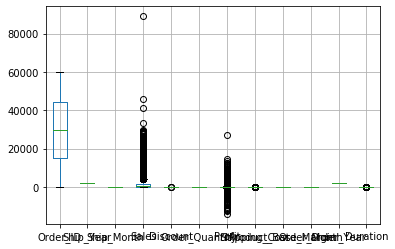

In [73]:
data.boxplot()

In [76]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

([<matplotlib.patches.Wedge at 0x1f3c9f8e4c8>,
  ...],
 [Text(1.0999999983309965, 6.059544572717927e-05, ''),
  Text(1.0999972345752296, 0.0024665617461411787, ''),
  Text(1.09998922580381, 0.004868584551493819, ''),
  Text(1.0999832205253801, 0.006075735561501573, ''),
  Text(1.0999756603151511, 0.0073175620425938465, ''),
  Text(1.0999748194157755, 0.007442892665641813, ''),
  Text(1.0999744414095778, 0.007498549572238481, ''),
  Text(1.0999728398783024, 0.007729911387774244, ''),
  Text(1.099966505541268, 0.008584095021139203, ''),
  Text(1.0999608418910516, 0.009281503451990032, ''),
  Text(1.0999600061322743, 0.00938002715813822, ''),
  Text(1.0999593686134068, 0.009454490974958926, ''),
  Text(1.0999576758195522, 0.009649425146034065, ''),
  Text(1.099953105328469, 0.01015707035804344, ''),
  Text(1.0999497198086579, 0.010517313956285692, ''),
  Text(1.099945431841026, 0.010956594911697674, ''),
  Text(1.099940565352204, 0.011434714367820455, ''),
  Text(1.099928679092363, 0.0125

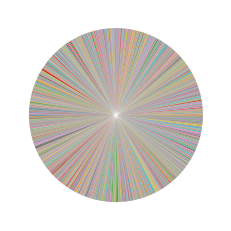

In [78]:
plt.pie(data["Sales"])

In [81]:
order_cat_info = data["Order_Priority"].value_counts()/ data["Order_Priority"].shape[0]

In [82]:
order_cat_info

HIGH             0.210501
LOW              0.204786
NOT SPECIFIED    0.199071
MEDIUM           0.194190
CRITICAL         0.191451
Name: Order_Priority, dtype: float64

([<matplotlib.patches.Wedge at 0x1f3d3c9de88>,
 [Text(0.8681077538052897, 0.6755656354368054, 'HIGH'),
  Text(-0.42346885863125305, 1.0152212201138942, 'LOW'),
  Text(-1.095232482437064, -0.10230253865250132, 'NOT SPECIFIED'),
  Text(-0.2638156595240963, -1.0678957335760202, 'MEDIUM'),
  Text(0.9069600407902108, -0.6224335180642342, 'CRITICAL')])

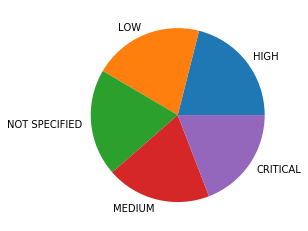

In [84]:
plt.pie(order_cat_info,labels=order_cat_info.index)

([<matplotlib.patches.Wedge at 0x1f3d479eac8>,
 [Text(0.9470266405148615, 0.7369806932037877, 'HIGH'),
  Text(-0.4619660275977306, 1.1075140583060663, 'LOW'),
  Text(-1.1947990717495245, -0.11160276943909234, 'NOT SPECIFIED'),
  Text(-0.28779890129901414, -1.1649771639011128, 'MEDIUM'),
  Text(0.9894109535893209, -0.679018383342801, 'CRITICAL')])

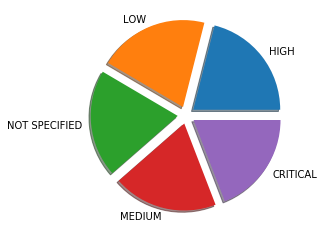

In [96]:
plt.pie(order_cat_info,explode=(0.1,0.1,0.1,0.1,0.1),shadow=1,labels=order_cat_info.index)